In [ ]:
#@title Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample


In [ ]:
#@title Load the Titanic dataset
from google.colab import drive
drive.mount('/content/drive')


data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Data Preprocessing

In [ ]:
#@title Visualize the data

data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#@title Handling missing values
data['Age'].fillna(data['Age'].mean(), inplace=True) # imputation
data.drop('Cabin', axis=1, inplace=True)  # Remove the 'Cabin' column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #imputation



In [ ]:
# Defining new features
# Define age group bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

In [ ]:
#@title Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
#@title One-Hot Encoding
# Transform categorical variables into numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Ticket' , 'Name' , 'Title' , 'AgeGroup'], drop_first=True)

In [ ]:
# Split data into features and target
X = data.drop("Survived" , axis=1)
y = data["Survived"]

In [ ]:
#@title Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#@title Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Balancing Classes (Upsample the minority class)
X_train, y_train = resample(X_train[y_train == 0], y_train[y_train == 0], n_samples=len(y_train[y_train !=0]), random_state=42)
X_train = np.concatenate((X_train, X[y==1], X[y==2]), axis=0)
y_train = np.concatenate((y_train, y[y==1], y[y==2]), axis=0)

In [ ]:
#@title Build Decision Tree Classifier
# Create a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#@title Make predictions and evaluate metrics
# Make predictions on the test data
y_pred = dtree.predict(X_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.77
Recall: 1.00
F1 Score: 0.87


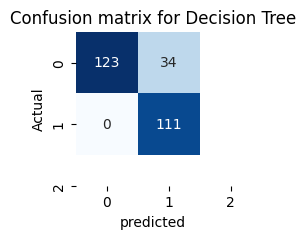

In [ ]:
#@title Confusion matrix
# Generate a confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(3), yticklabels=range(3))
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Decision Tree')
plt.show()

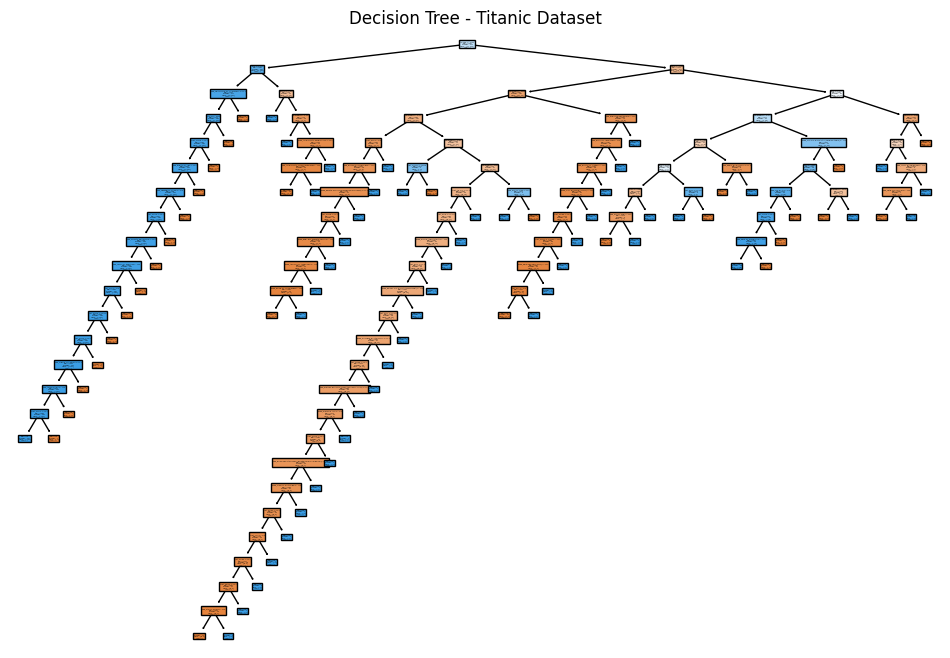

In [ ]:
#@title Visualizing the Decision Tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=data.columns, class_names=data['Survived'].unique().astype(str))
plt.title("Decision Tree - Titanic Dataset")
plt.show()


**i. Features that are important in predicting survival**


*   A few columns had missing values, it is important to handle them in order to predict the survival.
*   One-Hot encoding helps in encoding categorical values into numerical values which helps in predicting the survival rate.

**ii. Various steps taken to improve model performance**
   

* Balancing Classes (Upsample the minority class), this method is used to improve the performance, it improved recall score to 1.00.
* Data is split into 70-30 for training and testing as it is little more efficient than 80-20 for Decision Tree.
* Creating new features which increases model performance (Feature Engineering).
* Feature scaling didn't had any impact on the performance.




**iii. Challenges encountered and potential ways to further improve the model**


*  Choosing a model helps in improving the model performance, when the model the is evaluated using Logistic regression, the accuracy acquired was 0.83, after using Decision tree it improved to 0.87.
*   When the balancing classes(upsampling the minority class) has been turned off, the evaluation metrics were relatively low when compared to turning it on.
Accuracy also improved from 0.81 to 0.87.
* The model performed differently for 80-20 and 70-30 training and testing set.
So, it is important to check how efficient it is for both training and testing sets.



In [ ]:
#@title Random Forest Classifier

In [ ]:
#@title Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#@title Balancing Classes (Upsample the minority class)
X_train, y_train = resample(X_train[y_train == 0], y_train[y_train == 0], n_samples=len(y_train[y_train !=0]), random_state=42)
X_train = np.concatenate((X_train, X[y==1], X[y==2]), axis=0)
y_train = np.concatenate((y_train, y[y==1], y[y==2]), axis=0)

In [ ]:
#@title Build a Random Forest Classifier
# Create a Random Forest Classifier
rforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-Validation
cv_scores = cross_val_score(rforest, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f}')

# Fit the classifier to the training data
rforest.fit(X_train, y_train)


Cross-Validation Mean Accuracy: 0.78


RandomForestClassifier(random_state=42)

In [ ]:
#@title Make Predictions and Evaluate metrics
#Make predictions on the test data
y_pred = rforest.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Test Set Accuracy: 0.88
Precision: 0.77
Recall: 1.00
F1 Score: 0.87


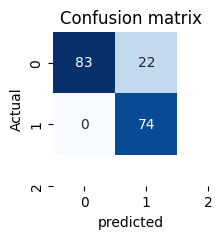

In [ ]:
#@title Confusion matrix for Random Forest
# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(3), yticklabels=range(3))
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

**i. Features that are important in predicting survival**


*   n_estimators that is 100 decision trees were taken into consideration.


**ii. Various steps taken to improve model performance**
   

*   Including Cross Validation for model performance.
* Balancing Classes (Upsample the minority class), this method is used to improve the performance, it improved recall score to 1.00.
* Data is split into 80-20 for training and testing as it is efficient than 70-30 for Random Forest.
   




**iii. Challenges encountered and potential ways to further improve the model**


*   Random Forests improved the model accuracy to 0.88 which is better as compared to Logistic Regression and Decision Tree.
*   When the balancing classes(upsampling the minority class) has been turned off, the evaluation metrics were relatively low when compared to turning it on.
Accuracy also improved from 0.82 to 0.88.
* The model performed differently for 70-30 and 80-20 training and testing set.
So, it is important to check how efficient it is for both training and testing sets.










In [ ]:
#@title Summary and Review

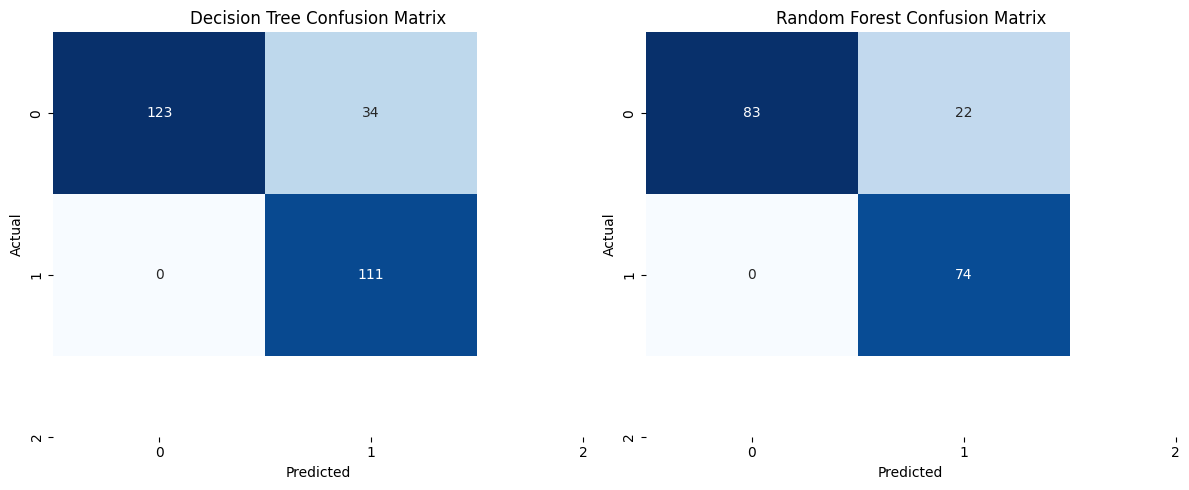

In [ ]:
#@title a. Plot to show Confusion Matrices for each method

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree Confusion Matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(3), yticklabels=range(3), ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(3), yticklabels=range(3), ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**b. The advantages and disadvantages of using a random forest compared to a single decision tree for this task**



*  For Titanic Dataset, Random Forest accuracy is 0.88 while Decision tree accuracy is 0.87, which shows Random Tree has performed better to some extent.

**Advantages of Random Forest to Decision Tree:**


*   Random Forest is more accurate than single Decision Tree.
*   It is more suitable for handling large datasets and lowers the risk of overfitting.
*   Random Forest is a combiantion of many decision trees, so there is more probability for accuracy.
*   Random Forest have less variance when compared to Decision Tree so it prevents overfitting of the data.
*   Random Forest can handle missing values.



**Disadvantages of Random Forest to Decision Tree:**

*   Random Forest can be hard to visualize and can't understand what it is being predicted.
*   Sometimes, the large number of trees can make the algorithm slow and it might be complex.



